# Preliminary Data Analysis with Sample Data

In [22]:
#Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy import stats as st
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
%matplotlib inline

As a part of the preliminary data analysis, we will be downsampling and work with 1.35% of original data.

1. Within the 1.35% of the data, will be splitting the data into train and test.

2. Will be validating the models with the sample before working on the full datasets.

3. Precision of the models are validated through the recall_precision_curve.


In [23]:
#Reading the clean file
masterData = pd.read_csv('Backorder.csv')

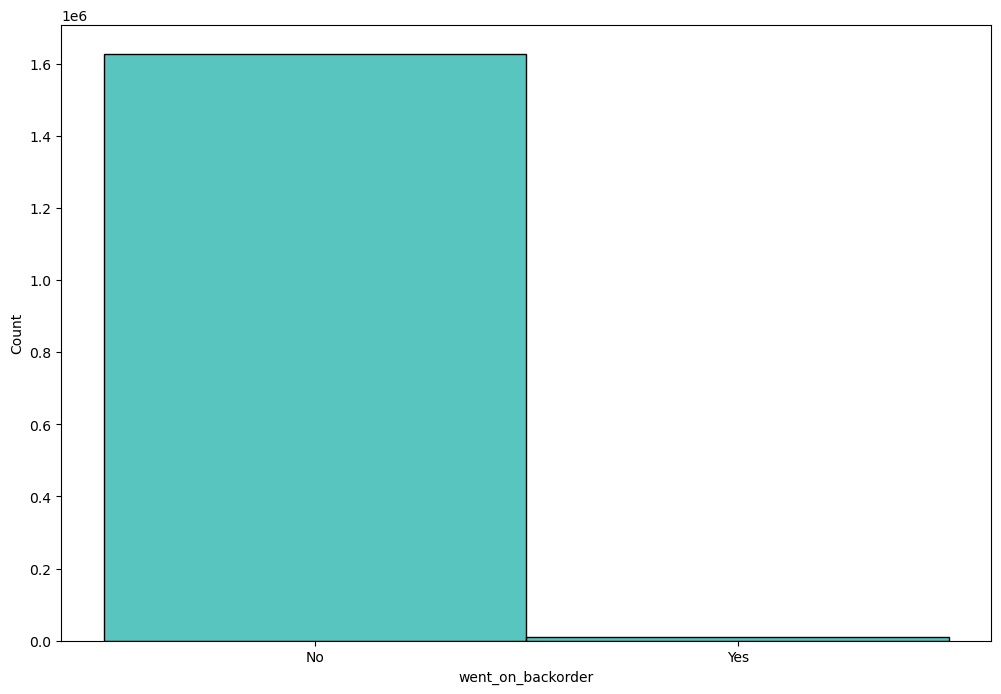

In [24]:
plt.figure(figsize=(12,8))
ax=sns.histplot(data=masterData,x='went_on_backorder',color='lightseagreen')
ax.figure.savefig('Mean.png', dpi=500,bbox_inches='tight')

In [25]:
masterData['went_on_backorder'].value_counts()

No     1628546
Yes      11188
Name: went_on_backorder, dtype: int64

In [26]:
join1=masterData[masterData['went_on_backorder']=='Yes']
join2=masterData[masterData['went_on_backorder']=='No']
join3=join2.sample(n=11000, random_state = 2)

masterData=pd.merge(join1,join3,how='outer')
masterData=masterData.sample(frac=1).reset_index(drop=True)
masterData

,product_id,current_inventory,transit_duration,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month,minimum_recommend_stock,source_has_issue,source_performance_6_months,source_performance_12_months,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3040484,3.0,8.0,13.0,38.0,64.0,85.0,0.0,No,0.94,0.97,No,No,No,Yes,No,Yes
1,2060435,30.0,12.0,0.0,0.0,1.0,1.0,1.0,No,0.93,0.89,No,No,No,Yes,No,No
2,2105968,0.0,9.0,0.0,0.0,0.0,0.0,0.0,No,0.70,0.66,No,No,No,Yes,No,No
3,1811918,0.0,2.0,2.0,2.0,2.0,2.0,0.0,No,0.80,0.82,Yes,No,No,Yes,No,Yes
4,1929889,1.0,2.0,6.0,14.0,21.0,31.0,0.0,No,0.93,0.94,No,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22183,1696625,0.0,12.0,6.0,15.0,21.0,24.0,0.0,No,0.63,0.72,No,No,No,Yes,No,Yes
22184,1747153,0.0,8.0,1.0,1.0,1.0,2.0,0.0,No,0.00,0.00,No,No,No,Yes,No,Yes
22185,1516847,9.0,2.0,0.0,0.0,0.0,0.0,0.0,No,0.97,0.92,No,No,No,Yes,No,Yes
22186,1120164,10.0,9.0,2.0,2.0,2.0,2.0,0.0,No,0.91,0.74,Yes,No,No,Yes,No,No


In [27]:
#Preparing the data for modeling
#X = pd.DataFrame(masterData.columns)
X = masterData[masterData.columns]
y = masterData['went_on_backorder']
X.shape, y.shape

((22188, 17), (22188,))

In [28]:
#Convert the categorical data into numerical
y = y.replace('Yes', 1)
y = y.replace('No', 0)
X['source_has_issue'] = X.source_has_issue.map({'Yes':1, 'No':0})
X['deck_risk'] = X.deck_risk.map({'Yes':1, 'No':0})
X['oe_constraint'] = X.oe_constraint.map({'Yes':1, 'No':0})
X['ppap_risk'] = X.ppap_risk.map({'Yes':1, 'No':0})
X['stop_auto_buy'] = X.stop_auto_buy.map({'Yes':1, 'No':0})
X['rev_stop'] = X.rev_stop.map({'Yes':1, 'No':0})
X = X.drop(['went_on_backorder','product_id'], axis = 1, errors = 'ignore')
X.shape, y.shape

((22188, 15), (22188,))

In [29]:
#get the 75% of the data
X_sample, X_data, y_sample, y_data = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_sample.shape, y_sample.shape, X_data.shape, y_data.shape

((16641, 15), (16641,), (5547, 15), (5547,))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size = 0.30, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11648, 15), (4993, 15), (11648,), (4993,))

In [31]:
X_train.isnull().sum()

current_inventory               0
transit_duration                0
prior_sales_1_month             0
prior_sales_3_month             0
prior_sales_6_month             0
prior_sales_9_month             0
minimum_recommend_stock         0
source_has_issue                0
source_performance_6_months     0
source_performance_12_months    0
deck_risk                       0
oe_constraint                   0
ppap_risk                       0
stop_auto_buy                   0
rev_stop                        0
dtype: int64

# Training the KNN Model Classifier

In [32]:
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_jobs = -1))]
#Create the pipeline: pipeline
pipeline_knn = Pipeline(steps)

# Fit to the training set
pipeline_knn.fit(X_train, y_train)
knn_prediction = pipeline_knn.predict( X_test )
# get the classification report
knn_report = classification_report( y_test, knn_prediction )
#print the report
print(knn_report)

              precision    recall  f1-score   support

           0       0.74      0.65      0.69      2472
           1       0.69      0.77      0.73      2521

    accuracy                           0.71      4993
   macro avg       0.71      0.71      0.71      4993
weighted avg       0.71      0.71      0.71      4993



# Training the SVC Model Classifier

In [33]:
steps = [('scaler', StandardScaler()),
        ('svc', svm.SVC(class_weight = 'balanced'))]
#Create the pipeline: pipeline
pipeline_svc = Pipeline(steps)

# Fit to the training set
pipeline_svc.fit(X_train, y_train)
svc_prediction = pipeline_svc.predict( X_test )
# get the classification report
svc_report = classification_report( y_test, svc_prediction )
#print the report
print(svc_report)

              precision    recall  f1-score   support

           0       0.57      0.66      0.61      2472
           1       0.61      0.51      0.56      2521

    accuracy                           0.59      4993
   macro avg       0.59      0.59      0.59      4993
weighted avg       0.59      0.59      0.59      4993



# Training the LogisticRegression Model 

In [34]:
steps = [('scaler', StandardScaler()),
        ('logreg', LogisticRegression(class_weight = 'balanced'))]
#Create the pipeline: pipeline
pipeline_logreg = Pipeline(steps)

# Fit to the training set
pipeline_logreg.fit(X_train, y_train)
logreg_prediction = pipeline_logreg.predict( X_test )
# get the classification report
logreg_report = classification_report( y_test, logreg_prediction )
#print the report
print(logreg_report)

              precision    recall  f1-score   support

           0       0.60      0.63      0.61      2472
           1       0.62      0.59      0.60      2521

    accuracy                           0.61      4993
   macro avg       0.61      0.61      0.61      4993
weighted avg       0.61      0.61      0.61      4993



C:\Users\abdea\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Training the RandomForest Classifier

In [35]:
#Train default RandomForest on 30% of the data
rfmodel = RandomForestClassifier(random_state = 42)
#Fit the training set
rfmodel.fit(X_train, y_train)
rfmodel_prediction = rfmodel.predict(X_test)
#get the classification report
rfmodel_report =  classification_report(y_test, rfmodel_prediction)
#print the report
print(rfmodel_report)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      2472
           1       0.88      0.92      0.90      2521

    accuracy                           0.90      4993
   macro avg       0.90      0.89      0.89      4993
weighted avg       0.90      0.90      0.89      4993



# Training GradientBoosting Classifier model

In [36]:
#Train default RandomForest on 30% of the data
gbmodel = GradientBoostingClassifier(random_state = 42)
#Fit the training set
gbmodel.fit(X_train, y_train)
gbmodel_prediction = gbmodel.predict(X_test)
#get the classification report
gbmodel_report =  classification_report(y_test, gbmodel_prediction)
#print the report
print(gbmodel_report)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      2472
           1       0.85      0.89      0.87      2521

    accuracy                           0.87      4993
   macro avg       0.87      0.87      0.87      4993
weighted avg       0.87      0.87      0.87      4993



# Training AdaBoostClassifier Model

In [37]:
#Train default RandomForest on 30% of the data
abmodel = AdaBoostClassifier(random_state = 42)
#Fit the training set
abmodel.fit(X_train, y_train)
abmodel_prediction = abmodel.predict(X_test)
#get the classification report
abmodel_report =  classification_report(y_test, abmodel_prediction)
#print the report
print(abmodel_report)

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      2472
           1       0.84      0.87      0.85      2521

    accuracy                           0.85      4993
   macro avg       0.85      0.85      0.85      4993
weighted avg       0.85      0.85      0.85      4993



# Training the AdaBoostClassifier with RandomForest Estimator

In [38]:
#Train default RandomForest on 30% of the data
abmodel_rf = AdaBoostClassifier(base_estimator = rfmodel, random_state = 42)
#Fit the training set
abmodel_rf.fit(X_train, y_train)
abmodel_prediction_rf = abmodel_rf.predict(X_test)
#get the classification report
abmodel_report_rf =  classification_report(y_test, abmodel_prediction_rf)
#print the report
print(abmodel_report_rf)

C:\Users\abdea\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.93      0.86      0.89      2472
           1       0.87      0.94      0.90      2521

    accuracy                           0.90      4993
   macro avg       0.90      0.90      0.90      4993
weighted avg       0.90      0.90      0.90      4993



In [39]:
feature_import_rf = pd.Series(rfmodel.feature_importances_, index = X_test.columns)
feature_import_rf.sort_values(ascending = False)


current_inventory               0.392721
source_performance_12_months    0.088035
source_performance_6_months     0.086992
prior_sales_9_month             0.080843
prior_sales_3_month             0.080260
prior_sales_6_month             0.078784
prior_sales_1_month             0.065008
minimum_recommend_stock         0.052775
transit_duration                0.046084
deck_risk                       0.012239
ppap_risk                       0.011511
stop_auto_buy                   0.003598
source_has_issue                0.000722
rev_stop                        0.000356
oe_constraint                   0.000071
dtype: float64

In [40]:
feature_import_gb = pd.Series(gbmodel.feature_importances_, index = X_test.columns)
feature_import_gb.sort_values(ascending = False)


current_inventory               0.649663
prior_sales_3_month             0.108847
prior_sales_1_month             0.106143
prior_sales_6_month             0.041378
prior_sales_9_month             0.039139
transit_duration                0.022887
source_performance_6_months     0.015603
minimum_recommend_stock         0.006982
source_performance_12_months    0.006883
rev_stop                        0.001185
deck_risk                       0.000624
ppap_risk                       0.000501
source_has_issue                0.000106
stop_auto_buy                   0.000059
oe_constraint                   0.000000
dtype: float64

# Traning the AdaBoostClassifier with GradientBoosting Estimator

In [41]:
#Train default AdaBoost model with the GB estimator
abmodel_gb = AdaBoostClassifier(base_estimator = gbmodel, random_state = 42)
#Fit the training model
abmodel_gb.fit(X_train, y_train)
abmodel_prediction_gb = abmodel_gb.predict(X_test)
#get the classication report
abmodel_report_gb = classification_report(y_test, abmodel_prediction_gb)
#print the report
print(abmodel_report_gb)

C:\Users\abdea\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      0.86      0.88      2472
           1       0.87      0.90      0.89      2521

    accuracy                           0.88      4993
   macro avg       0.88      0.88      0.88      4993
weighted avg       0.88      0.88      0.88      4993



Text(0.5, 1.0, 'ROC Curve')

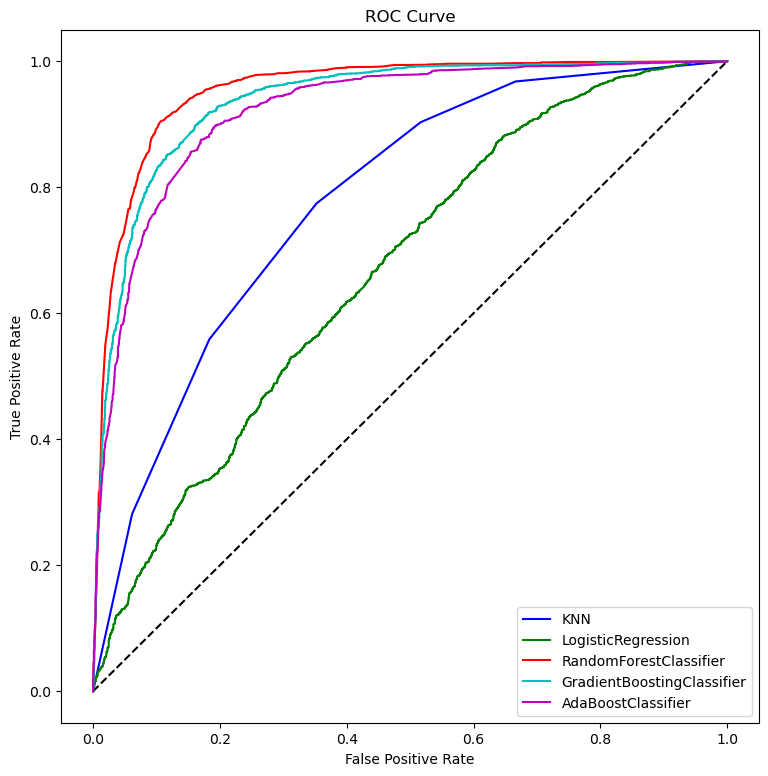

In [42]:
#plot ROC Curves
fig , ax1 = plt.subplots(figsize=(9,9) )
plt.plot([0, 1], [0, 1], 'k--')
estimators =[pipeline_knn, pipeline_logreg, rfmodel, gbmodel, abmodel ]
classifiers=['KNN', 'LogisticRegression', 'RandomForestClassifier','GradientBoostingClassifier',
           'AdaBoostClassifier']
colors = ['b', 'g', 'r', 'c', 'm']
for i, estimator in enumerate(estimators):
    y_pred_prob = estimator.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=classifiers[i],color=colors[i]) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.title('ROC Curve')

Text(0.5, 1.0, 'Recall Precision Curve')

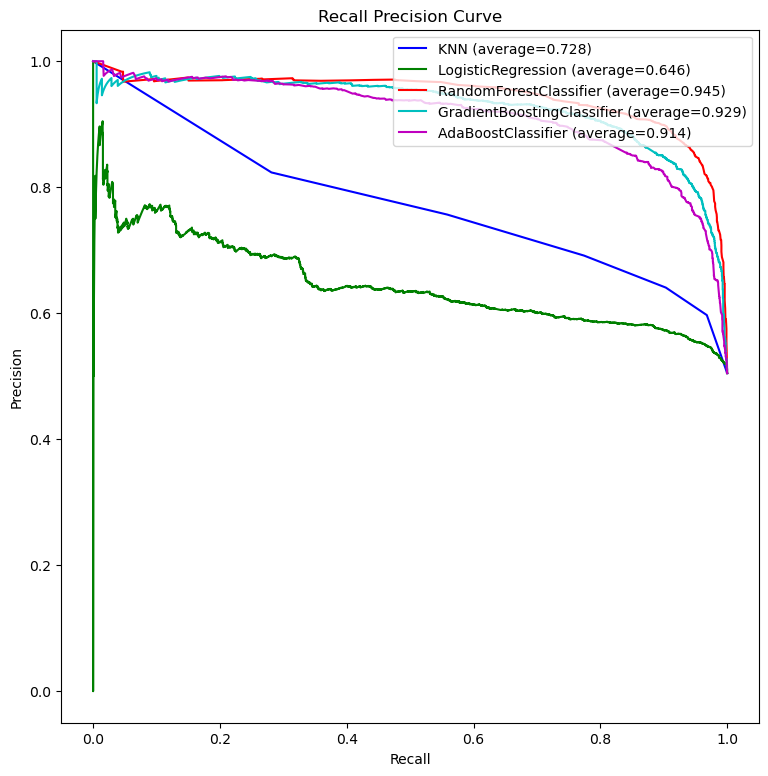

In [43]:
#plot Recall-Precision Curves
fig , ax1 = plt.subplots(figsize=(9,9) )
estimators =[pipeline_knn, pipeline_logreg, rfmodel, gbmodel, abmodel ]
classifiers=['KNN', 'LogisticRegression', 'RandomForestClassifier','GradientBoostingClassifier',
           'AdaBoostClassifier']
colors = ['b', 'g', 'r', 'c', 'm']
for i, estimator in enumerate(estimators):
    y_pred_prob = estimator.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test,y_pred_prob)
    average_precision= average_precision_score(y_test, y_pred_prob, average="micro")
    plt.plot(recall, precision, label='%s (average=%.3f)'%(classifiers[i],average_precision), color=colors[i])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=1)
plt.title('Recall Precision Curve')